In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [2]:
gas=pd.read_csv("gas_turbines.csv")

In [3]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Checking for null values

In [4]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Checking for duplicate values

In [5]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Distributions of the independant variables

C:\Users\dktiw\AppData\Local\Temp\ipykernel_32052\898318937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AT)


<Axes: xlabel='AT', ylabel='Density'>

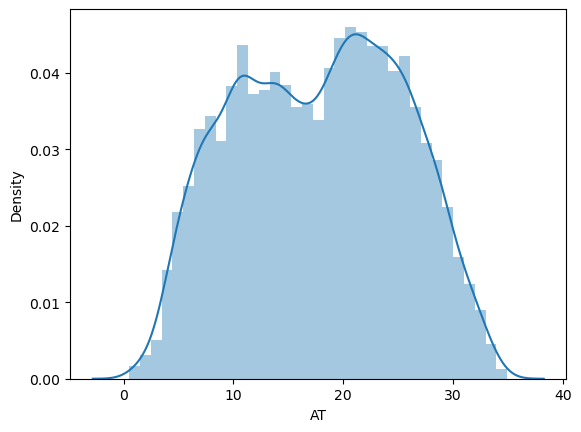

In [6]:
sns.distplot(gas.AT)

C:\Users\dktiw\AppData\Local\Temp\ipykernel_32052\852744401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AP)


<Axes: xlabel='AP', ylabel='Density'>

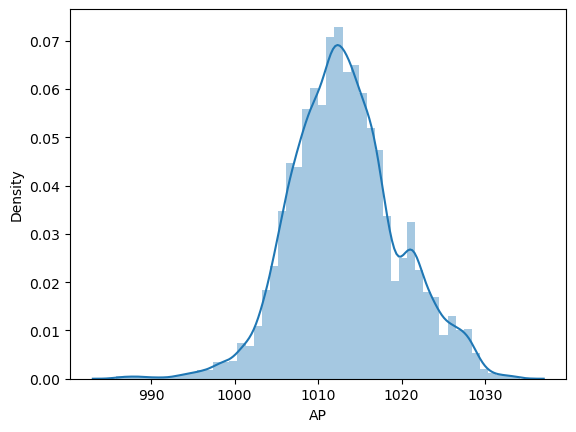

In [7]:
sns.distplot(gas.AP)

C:\Users\dktiw\AppData\Local\Temp\ipykernel_32052\1676358491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AH)


<Axes: xlabel='AH', ylabel='Density'>

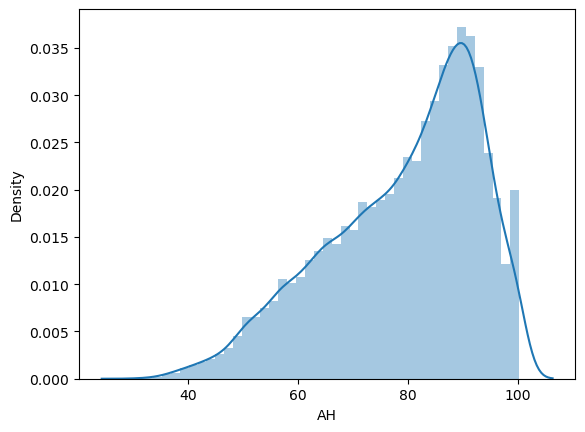

In [8]:
sns.distplot(gas.AH)

### Splitting dependant and independant variables

In [9]:
y=gas["TEY"]

### Only taking ambient variables as independant variables

In [10]:
x=gas.iloc[:,:3]

In [11]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Converting the independant variables into a numpy array

In [13]:
x1=x.values

In [14]:
x1


array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [15]:
y1=y.values

In [16]:
y1

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

### Model Building

### We use relu as activation function n input and hidden layers and linear as activation function in the output layer.

### We use mean squared error as the loss function

In [17]:
model=Sequential()
model.add(Dense(3,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
history=model.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 19685.7578 - val_loss: 17375.7598
Epoch 2/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18217.4863 - val_loss: 17114.7070
Epoch 3/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18001.9434 - val_loss: 16855.7188
Epoch 4/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17651.9277 - val_loss: 16598.6836
Epoch 5/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17394.3340 - val_loss: 16343.7646
Epoch 6/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17158.0098 - val_loss: 16090.9365
Epoch 7/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16922.8789 - val_loss: 15840.1484
Epoch 8/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16635.1309 - val_loss: 15591.4102
Epoch 9/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16383.5967 - val_loss: 15344.7236
Epoch 10/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16067.4727 - val_loss: 15099.8994
Epoch 11/250
1008/1008 ━━━━━━

In [20]:
model.evaluate(x1,y1)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 270.2351


251.77513122558594

### The model has as mse error of 223.43

In [21]:
pred=model.predict(x1)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [22]:
pred

array([[135.28839],
       [135.28839],
       [135.28839],
       ...,
       [135.28839],
       [135.28839],
       [135.28839]], dtype=float32)

In [23]:
history.history

{'loss': [18668.658203125,
  18158.79296875,
  17892.876953125,
  17628.20703125,
  17365.029296875,
  17105.0859375,
  16845.33203125,
  16590.134765625,
  16334.921875,
  16082.296875,
  15831.685546875,
  15583.8125,
  15337.54296875,
  15093.48046875,
  14850.9052734375,
  14609.81640625,
  14371.0029296875,
  14135.54296875,
  13902.26171875,
  13668.5166015625,
  13438.5107421875,
  13210.3134765625,
  12984.5625,
  12760.6298828125,
  12537.4462890625,
  12317.8857421875,
  12098.6044921875,
  11882.20703125,
  11668.6201171875,
  11456.6982421875,
  11246.6328125,
  11037.3837890625,
  10832.32421875,
  10627.7568359375,
  10425.7939453125,
  10226.7216796875,
  10028.412109375,
  9833.1787109375,
  9637.6904296875,
  9445.2724609375,
  9255.794921875,
  9068.1630859375,
  8881.1484375,
  8697.8994140625,
  8515.3232421875,
  8335.33203125,
  8157.34619140625,
  7981.38232421875,
  7807.5869140625,
  7635.94384765625,
  7466.806640625,
  7297.99072265625,
  7132.3349609375,
  6

### Plotting the mse error vs epoch

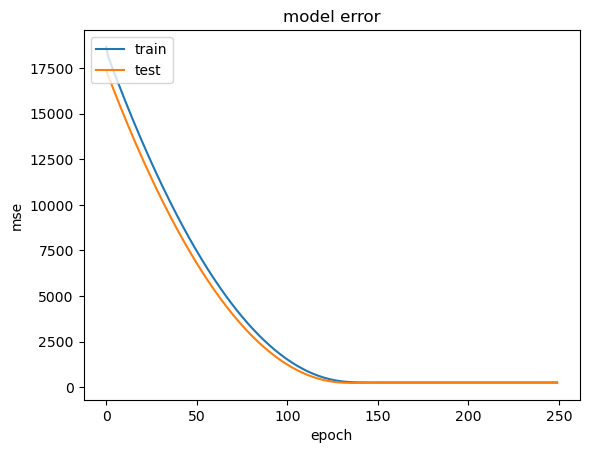

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### decreasing the number of nodes in hidden layer

In [25]:
model2=Sequential()
model2.add(Dense(3,  activation='relu'))
model2.add(Dense(2,  activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
history=model2.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 242459.2969 - val_loss: 23101.7324
Epoch 2/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19756.9004 - val_loss: 17309.6035
Epoch 3/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18224.4160 - val_loss: 17107.0957
Epoch 4/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17921.0703 - val_loss: 16873.5645
Epoch 5/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17683.7695 - val_loss: 16626.6504
Epoch 6/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17436.6602 - val_loss: 16375.4189
Epoch 7/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17186.4590 - val_loss: 16123.7178
Epoch 8/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16949.2246 - val_loss: 15873.2695
Epoch 9/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16699.8906 - val_loss: 15624.5088
Epoch 10/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16438.3145 - val_loss: 15377.5254
Epoch 11/250
1008/1008 ━━━━━

In [26]:
model2.evaluate(x1,y1)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270.2355


251.7873077392578

### This model gives a significantly worse error

### Adding an additional hidden layer to the model

In [27]:
model3=Sequential()
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer='adam')
history=model3.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 18465.2695 - val_loss: 17371.0020
Epoch 2/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18226.1172 - val_loss: 17109.3730
Epoch 3/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17948.2207 - val_loss: 16850.1289
Epoch 4/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17609.5488 - val_loss: 16593.0918
Epoch 5/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17447.7012 - val_loss: 16338.2920
Epoch 6/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17176.7852 - val_loss: 16085.5371
Epoch 7/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16904.5273 - val_loss: 15834.7295
Epoch 8/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16608.5098 - val_loss: 15586.0439
Epoch 9/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16339.7627 - val_loss: 15339.3623
Epoch 10/250
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16123.9922 - val_loss: 15094.7275
Epoch 11/250
1008/1008 ━━━━━━

In [28]:
model3.evaluate(x1,y1)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270.2353


251.77561950683594

### Plotting the mse

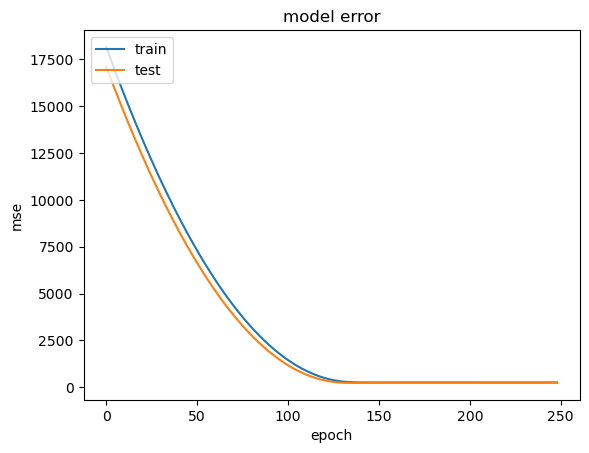

In [29]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### model and model3 has comparable accuracy and model is computationally simpler so model1 is taken as final model

In [30]:
model_final=model

In [31]:
model_final

<Sequential name=sequential, built=True>